<a href="https://colab.research.google.com/github/zj71/Computer-Vision/blob/main/%E2%80%9C_CV_Lab_Session_2_Solutions_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Welcome to todays lab session. This lab is entirely in Python and should not require you writing many lines of code. We will again fill in the blanks of this Colab notebook.
You'll need a google account to continue, but it's pretty straightforward to sign up if you don't have one already.

If you're unfamiliar with colab then please see the [documentation](https://colab.research.google.com/notebooks/welcome.ipynb). The easiest way to complete this session is to log into a Google account and save a copy to your google drive. Alternatively, you could save this document to your machine, or a lab machine (using Citrix to login) and open as a Jupyter notebook.


**Top Tips**
+ Check the documentation and links for help!
+ Remember assignment in Python is by reference! If you want to make a copy of a numpy object use [np.copy](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) to do a [deepcopy](https://docs.python.org/3/library/copy.html).
+ Calling [plt.show](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.show.html) shows whatever you've been trying to visualise this far as a single figure. If you want multiple axis on a single figure you can use [subplot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplot.html)

# Preparation
We are going to download an example image to work with, but you can upload your own images by following the colaboratory [guidance](https://colab.research.google.com/notebooks/io.ipynb). Personally, I think the easiest way to do it is to use the files menu on the side of the screen.

In [ ]:
!wget "http://www.sussex.ac.uk/broadcast/images/uploads/2016/02/5848.item.jpg" -O sussex.jpg
!wget "http://users.sussex.ac.uk/~is321/sad_snowman.jpg" -O sad_snowman.jpg
!wget "http://users.sussex.ac.uk/~is321/bri_beach.jpg" -O bri_beach.jpg
!wget "https://upload.wikimedia.org/wikipedia/commons/a/a0/Meeting_House%2C_University_of_Sussex.JPG" -O meeting_house.jpg


--2021-02-04 21:23:15--  http://www.sussex.ac.uk/broadcast/images/uploads/2016/02/5848.item.jpg
Resolving www.sussex.ac.uk (www.sussex.ac.uk)... 139.184.32.51
Connecting to www.sussex.ac.uk (www.sussex.ac.uk)|139.184.32.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28074 (27K) [image/jpeg]
Saving to: ‘sussex.jpg’

sussex.jpg          100%[===================>]  27.42K  59.2KB/s    in 0.5s    

2021-02-04 21:23:16 (59.2 KB/s) - ‘sussex.jpg’ saved [28074/28074]

--2021-02-04 21:23:16--  http://users.sussex.ac.uk/~is321/sad_snowman.jpg
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395733 (386K) [image/jpeg]
Saving to: ‘sad_snowman.jpg’

sad_snowman.jpg     100%[===================>] 386.46K   378KB/s    in 1.0s    

2021-02-04 21:23:17 (378 KB/s) - ‘sad_snowman.jpg’ saved [395733/395733]

--2021-02

# Common Packages
We are also going to import some standard packages:
+ [opencv (cv2)](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html) A general purpose package for computer vision.
+ [matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot) A general purpose data visualising library
+ [numpy](https://numpy.org/doc/stable/) A numerical python package for arrays, linear algebra etc.

**Remmember** to convert any images we load to RGB from BGR


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('./sussex.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_ss = cv2.imread('./sad_snowman.jpg')
img_ss = cv2.cvtColor(img_ss, cv2.COLOR_BGR2RGB)

img_bb = cv2.imread('./bri_beach.jpg')
img_bb = cv2.cvtColor(img_bb, cv2.COLOR_BGR2RGB)





error: ignored

# Image histograms
Let's play around with image histograms a bit to see how they can be calculated
1. Use matplotlib to [plot the histogram](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) of a **grayscale image**. Don't forget you need to remove the spatial dimensions! There's a function in numpy called [flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) that you can use for this. Look at the the histogram function to see why you need to flatten the data first [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
2. Experiment with changing the number of histogram bins. What effect does this have on the shape? Look at the [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html). Maybe add a title to each histogram?
5. Try doing histogram equalisation (using opencv2 [see this documentation](https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html)) on the gray image

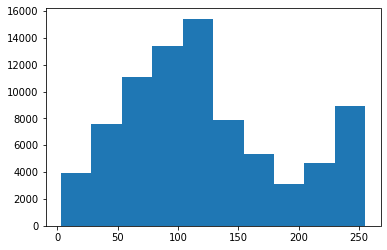

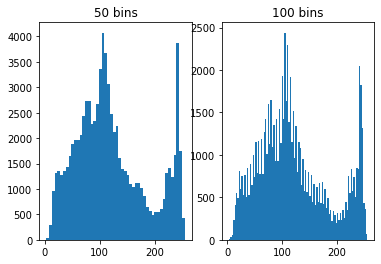

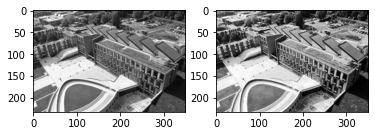

In [ ]:
# Convert the image to grayscale by taking the mean of the colour values (note that openCV can also do this)
# Make sure we cast the image back to a uint8 after the mean!
img_gray = np.uint8(np.mean(img, axis=-1))

# Remove the spatial dimension from the image
flat_gray_img = img_gray.flatten()
# Create and show a histogram
plt.hist(flat_gray_img)
plt.show()


# Now try making a new histogram, with different numbers of bins.
plt.subplot(1,2,1)
plt.hist(img_gray.flatten(), bins=50)
plt.title('50 bins')
plt.subplot(1,2,2)
plt.title('100 bins')
plt.hist(img_gray.flatten(), bins=100)
plt.show()


# Perform histogram equalisation on the grayscale image, compare the results with the original grayscale image
img_gray_eq = cv2.equalizeHist(img_gray)
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray_eq, cmap='gray')
plt.show()

#Colour histograms
1. Wouldn't it be nice to make histograms of RGB images? We can do this by changing the shape of the data we pass to plt.hist. We still want to remove the spatial dimension but keeep the colours, so the array we pass to hist should have shape [num_of_pixels, 3]. Look at using [numpy.reshape](https://numpy.org/doc/1.18/reference/generated/numpy.reshape.html). Read the [histogram documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) to understand why. **note** if you don't know the exact size of a shape dimension you can write -1 and it will work it out.
4. Load in 2 images of different scenes (e.g. beach and the sad snowman) do the histogram looks very different? use matplotlibs [subplot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplot.html) functionality to put the images and histograms on the same figure

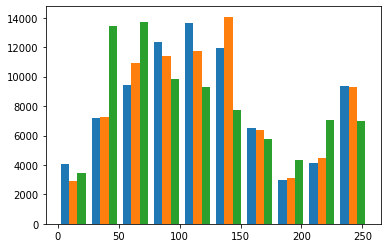

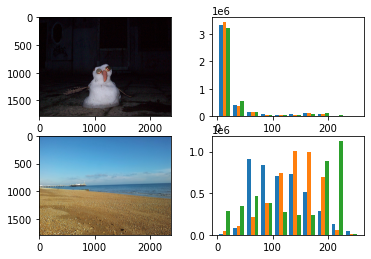

In [ ]:
# Reshape the colour image to remove the spatial dimensions but keeping the 3 colour channels
reshaped_img = np.reshape(img, (-1, 3))
plt.hist(reshaped_img, bins=10)
plt.show()

# Load two colour images and plot colour histograms next to them, are they very different?
plt.subplot(2,2,1)
plt.imshow(img_ss)
plt.subplot(2,2,2)
plt.hist(np.reshape(img_ss, (-1, 3)), bins=10)
plt.subplot(2,2,3)
plt.imshow(img_bb)
plt.subplot(2,2,4)
plt.hist(np.reshape(img_bb, (-1, 3)), bins=10)
plt.show()

# 1D Convolutions
Let's try and implement our own simple convolution function! To keep is simple we will ignore the ends of the array, and should produce a similar result to [scipy.signal.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).
1. Write your own convolution function that can apply the filter [-1, 0, 1] to the array y. To simplify things, only consider odd-sized filters (see the lecture slides for why). Please also refer back to the lecture slides for psuedocode on convolutiopn. You can use [scipy.signal.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) to check your work. Make sure you check the 'mode' arguments, and remember it **flips** the template!
2. What does the filter [-1, 0, 1] do when you apply it?  Plot the output of your function.
2. Plot the original signal on the same plot as your convolved output. You can make multiple calls to plt.plot which draw the results on the same axis. Note that your output may be shorter as we ignored the ends of the array. Note, using plt.plot or plt.scatter where x is the array position.
3. Next try applying the filter [0.1, 0.8, 0.1] to the array. What does this do? How could you increase the strength of the effect?


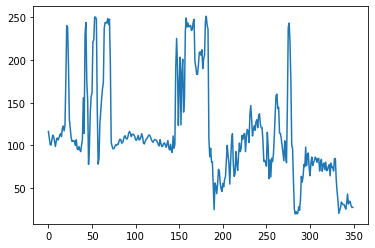

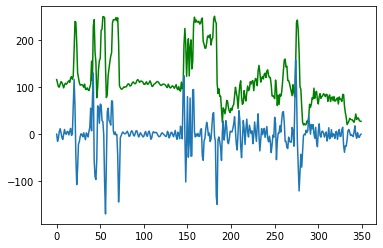

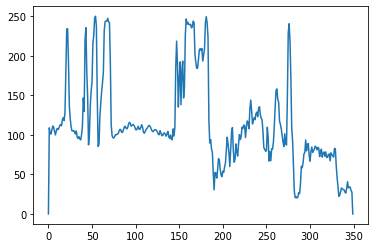

In [ ]:
# Take a row of the image to use as daya
y = img_gray[200, :]
# If we use range it counts from 0 to the length of y, and we can see our 1D signal
plt.plot(range(len(y)), y)
plt.show()



# Write a convolution function 
def convolve1D(data,kernel):
  # output array of this function will look similar to scipy.signal.convolve with `mode='valid'`
  output = []
  template = kernel[::-1] # flipping the kernel filter to a template
  
  for i in range(0,len(data)-len(template)+1):
    res_i = 0
    for j in range(len(template)):
      res_i += data[i+j] * template[j]
    output.append(res_i)

  return np.array(output)

# Plot the output of the convolution function applied to y
k1 = np.array([-1, 0, 1.0])
plt.plot(range(len(y)), convolve1D(y, k1))
plt.show()

# Plot y, and the output of your convolution function
plt.plot(range(len(y)), y, 'g')
plt.plot(range(len(y)), convolve1D(y, k1))
plt.show()

# Try changing the filter you're applying.
k2 = np.array([0.1, 0.8, 0.1])
plt.plot(range(len(y)), convolve1D(y, k2))
plt.show()



# Extensions
You don't have to do these, but if you complete the lab and want to learn more then give these a go! You also don't need to do them in any particular order.

+ Extend your convolution code to use zero-padding or reflection padding and arbitrary length convolutional kernels.

+ Extend your own convolution code to 2D

+ How might we measure the distance between histograms? Construct a distance measure and test it on the pair of images you loaded earlier. Working with a normalised histogram might help!

+ Test histogram equalisation on the color image, treating each color separately? Does it look a bit weird? Why? You should be able to improve matters by using the LAB colour space.

+ Upload 2 images containing either similar/different content, e.g. beach scenes, snowmen. Choose 1 image to modify and design a method to make the histogram of image 1 match image 2. This is a method of doing colour balancing with a known target color distribution.

In [ ]:
# For distances between histograms, if we normalise the 
# histograms then we can think of them as probability distributions. 
# Then we could use a measure like mutual information or kullback leibler distance

# Histogram equalisation doesn't work well if colour channels are treated separately.
# It can be applied to the L channel of LAB, which leads to a good effect in terms of contrast
# improvement



